In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [2]:
data  = pd.read_excel('../data/baraka_hygienics_2023-24.xlsx', sheet_name="Expenditure per year"); data.head()

,Years,Expenditure,Expenses Category,Expenses,Total,Products,Product Category,Revenue,Sales,Profit
0,2023-06-01,RAW MATERIALS,RAW MATERIALS,3750.0,35027.0,1L SHOWER GEL,SHOWER GEL,500,54350.0,19323.0
1,2023-06-01,TRANSPORT,TRANSPORT,1300.0,NaN,1L SHOWER GEL,SHOWER GEL,500,NaN,NaN
2,2023-06-01,NCBA BANK KENYA PLC,OTHERS,4000.0,NaN,2L SHOWER GEL,SHOWER GEL,1015,NaN,NaN
3,2023-06-01,RAW MATERIALS,RAW MATERIALS,3000.0,NaN,ANKARA,ANKARA,9400,NaN,NaN
4,2023-06-01,TRANSPORT,TRANSPORT,477.0,NaN,ANKARA,ANKARA,1200,NaN,NaN


In [3]:
df = data.groupby('Years').apply(lambda x: pd.Series({'Cost':  x['Total'].sum(),
                                                      'Sales': x['Sales'].sum(),
                                                      'Profit': x['Profit'].sum()
                                                     }), 
                                 include_groups=False).reset_index().rename(columns ={'Years': 'Month'}); df

,Month,Cost,Sales,Profit
0,2023-06-01,35027.0,54350.0,19323.0
1,2023-07-01,48065.0,66417.0,18352.0
2,2023-08-01,18370.0,51712.0,33342.0
3,2023-09-01,37480.0,59582.0,22102.0
4,2023-10-01,23390.0,89290.0,65900.0
5,2023-11-01,24200.0,50590.0,26390.0
6,2023-12-01,13748.0,48415.0,34667.0
7,2024-01-01,16720.0,40837.0,24117.0
8,2024-02-01,23905.0,31339.0,7434.0
9,2024-03-01,24914.0,52790.0,27876.0


### Financial Metrics

In [4]:
def compute_metrics(df, year):
    metrics_df = df.copy()
    metrics_df['Year'] = metrics_df['Month'].dt.year 
    metrics_df = metrics_df[(metrics_df['Year'] == year) | (metrics_df['Year'] == year-1)]
    
    annual_profit = metrics_df.groupby('Year')['Profit'].sum().reset_index()
    annual_profit['profit_change'] = annual_profit['Profit'].pct_change() * 100
    annual_profit.set_index('Year', inplace = True)
    
    annual_cost = metrics_df.groupby('Year')['Cost'].sum().reset_index()
    annual_cost['cost_change'] = annual_cost['Cost'].pct_change() * 100
    annual_cost.set_index('Year', inplace = True)

    return pd.concat([annual_profit.tail(1).fillna(0), annual_cost.tail(1).fillna(0)], axis = 1)

#### 2024 (Profit & Cost Change)

In [5]:
compute_metrics(df, 2024)

,Profit,profit_change,Cost,cost_change
Year,,,,
2024,109561.0,-50.216743,142802.0,-28.698822


#### 2023 (Profit & Cost Change)

In [6]:
compute_metrics(df, 2023)

,Profit,profit_change,Cost,cost_change
Year,,,,
2023,220076.0,0.0,200280.0,0.0



Cost shows a relatively stable trend with a few significant drops, notably in August and December 2023.
Sales display more variability, with a peak in October 2023 and a notable drop by June 2024.
Profit closely mirrors the trend in sales, suggesting a strong correlation between sales and profit. The significant peak in October 2023 and the negative profit in June 2024 stand out.

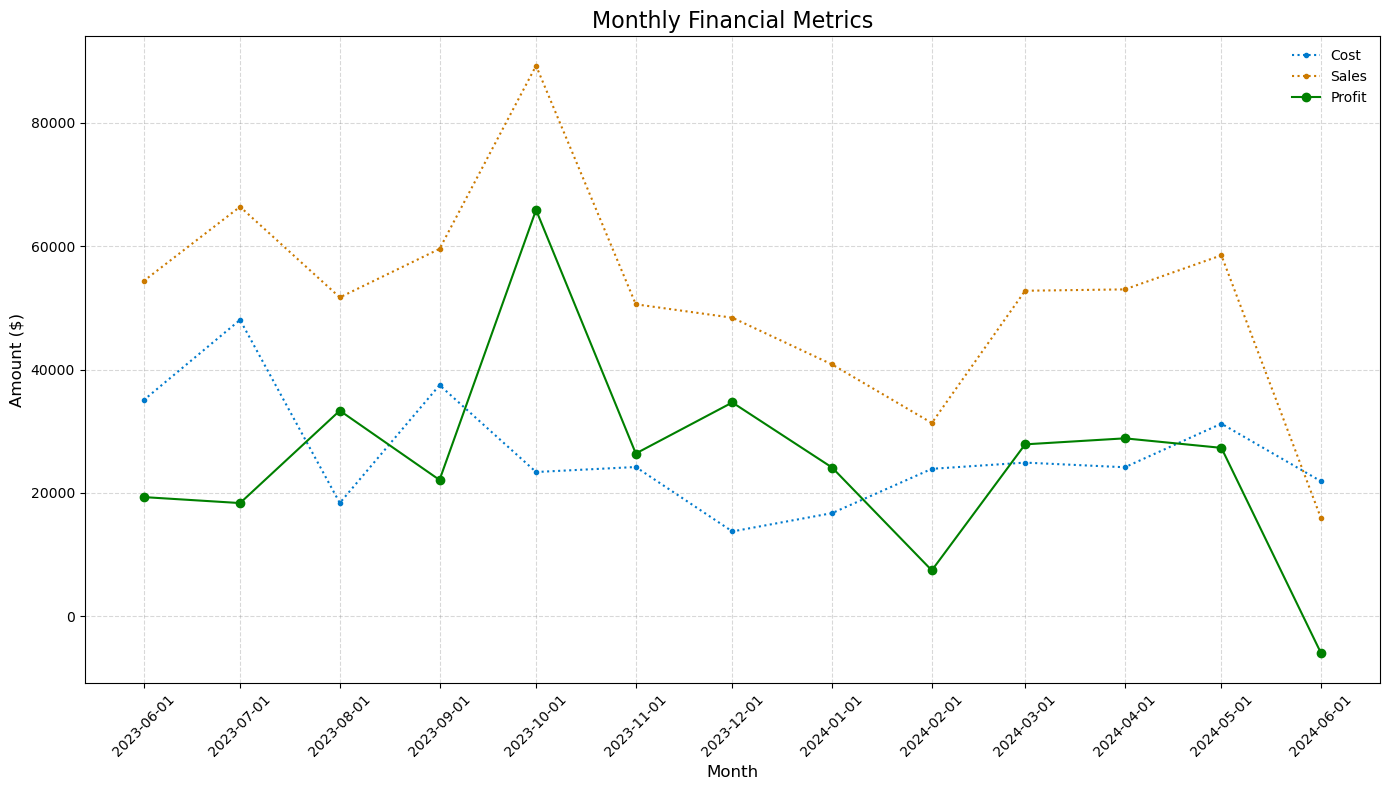

In [7]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df['Month'], df['Cost'], label='Cost', marker='.', linestyle=':', color='#007ACC', linewidth=1.5)
ax.plot(df['Month'], df['Sales'], label='Sales', marker='.', linestyle=':', color='#CC7A00', linewidth=1.5)
ax.plot(df['Month'], df['Profit'], label='Profit', marker='o', linestyle='-', linewidth=1.5, color='green')

ax.set_title('Monthly Financial Metrics', fontsize=16)
plt.xticks(df['Month'], rotation=45)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Amount ($)', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--', color='gray')
ax.legend(frameon=False, fontsize=10)
plt.tight_layout()
plt.show()

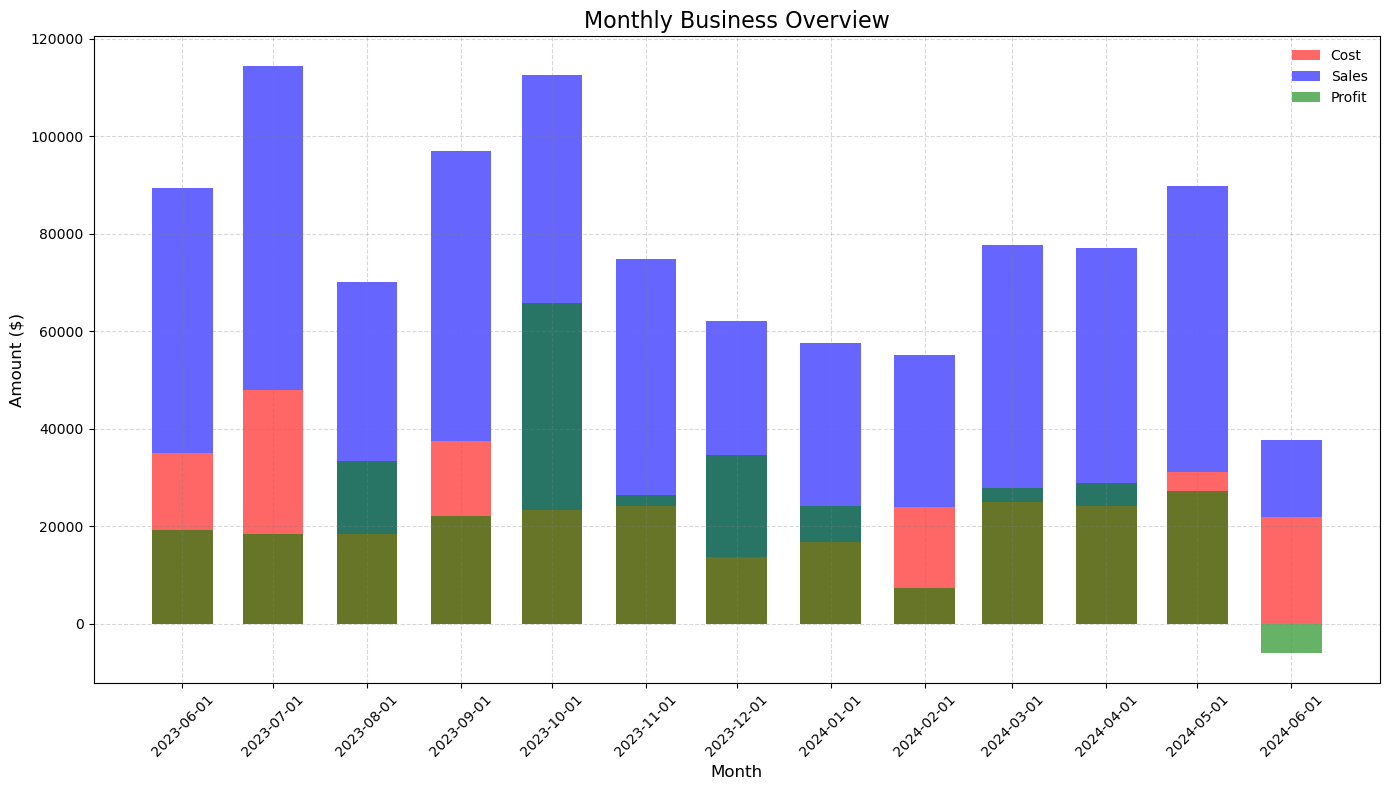

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.bar(df['Month'], df['Cost'], width=20, label='Cost', color='red', alpha=0.6)
plt.bar(df['Month'], df['Sales'], width=20, label='Sales', color='blue', alpha=0.6, bottom=df['Cost'])
plt.bar(df['Month'], df['Profit'], width=20, label='Profit', color='green', alpha=0.6)

ax.set_title('Monthly Business Overview', fontsize=16)
plt.xticks(df['Month'], rotation=45)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Amount ($)', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--', color='gray')
ax.legend(frameon=False, fontsize=10)
plt.tight_layout()
plt.show()

### Expenses by Expenditure.

In [9]:
expenditure_df = data.groupby('Expenditure')['Revenue'].sum().reset_index().sort_values(['Revenue'], ascending = False); 
expenditure_df = expenditure_df.set_index('Expenditure')

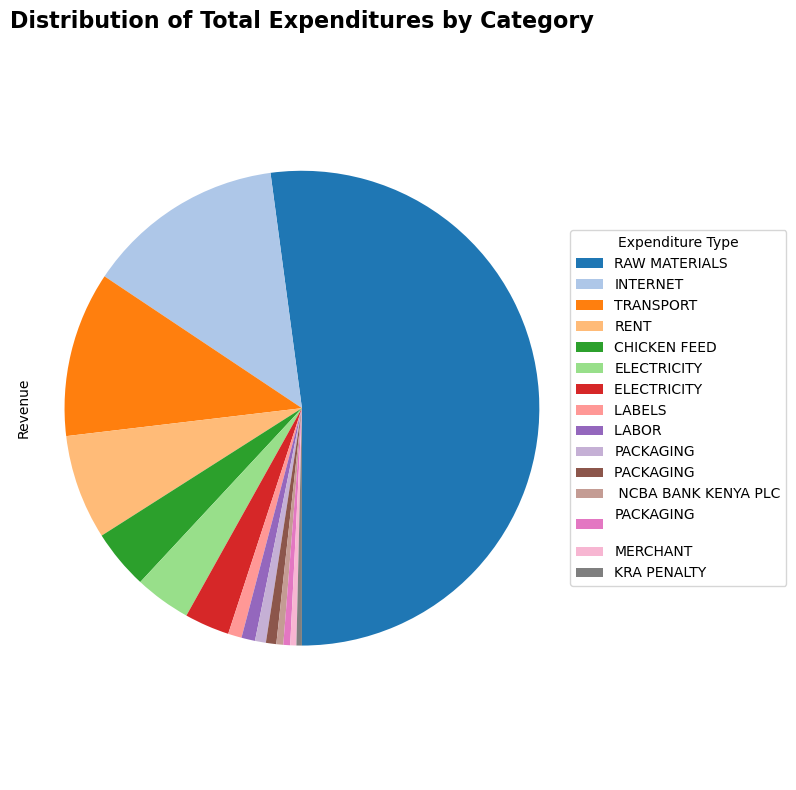

In [10]:
colors = plt.get_cmap('tab20').colors

fig, ax = plt.subplots(figsize=(8, 8))
expenditure_df['Revenue'].plot(kind='pie', ax=ax, startangle=270, colors=colors[:len(expenditure_df)], labels=None)

plt.legend(title="Expenditure Type", labels=expenditure_df.index, bbox_to_anchor=(1, 0.5), loc='center left')
plt.title('Distribution of Total Expenditures by Category', fontsize=16, fontweight='bold')
plt.axis('equal') 
plt.tight_layout()
plt.show()

In [12]:
df['Month'].dt.year.max()

2024